In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AOI_bounded.csv')[[
    'datetime', 'x', 'y', 'v_x', 'v_y', 'v_len', 'sun_altitude',
    'sun_azimuth', 'spacial_location', 'turbidity', 'LRO_discharge',
    'LRO_discharge_site', 'vegetation', 'visibility', 'cloudcover',
    'solarradiation', 'uvindex', 'conditions', 'AOI'
]]
# df

In [24]:
aoi = pd.read_csv('AOI_analysis.csv')
aoi['datetime'] = [row.video.split('.')[0].split('_', maxsplit=2)[-1] for index, row in aoi.iterrows()]
aoi.datetime = pd.to_datetime(aoi.datetime, format='%Y-%m-%d_%H-%M-%S')
# aoi

<Axes: xlabel='v_len', ylabel='Count'>

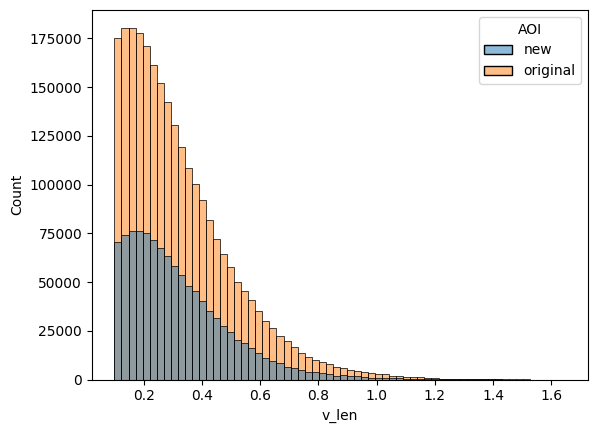

In [25]:
sns.histplot(
    data=df[df.v_len >= 0.1],
    x='v_len',
    hue='AOI',
    bins=64
)

In [ ]:
# sns.histplot(
#     # data=df[df.v_len >= 0.1],
#     data=df[df.AOI == 'original'],
#     x='v_len',
#     hue='AOI',
#     bins=64
# )
# plt.xlim(-0.75, 1.75)

In [30]:
for timestamp in sorted(df.datetime.unique()):
    print(timestamp)
    print(f"original mean v_len: {np.mean(df[(df.datetime == timestamp) & (df.AOI == 'original')].v_len)}")
    print(f" bounded mean v_len: {np.mean(df[(df.datetime == timestamp) & (df.AOI == 'new')].v_len)}")
    # display(aoi[aoi.datetime == timestamp])
    print(f"area ratio (new to old): {aoi[aoi.datetime == timestamp].new_AOI_area.values[0] / aoi[aoi.datetime == timestamp].original_AOI_area.values[0]}")
    print()

2024-01-01 07:51:43
original mean v_len: 0.22029952410414508
 bounded mean v_len: 0.22856515713724998
area ratio (new to old): 0.7995320808224033

2024-01-03 08:19:59
original mean v_len: 0.24338939358338604
 bounded mean v_len: 0.24802877664765102
area ratio (new to old): 0.7995320808224033

2024-01-05 08:46:21
original mean v_len: 0.2139954284780054
 bounded mean v_len: 0.21290689085170206
area ratio (new to old): 0.7995320808224033

2024-01-07 08:37:26
original mean v_len: 0.2743866024412445
 bounded mean v_len: 0.2796052531112326
area ratio (new to old): 0.7995320808224033

2024-02-02 07:44:13
original mean v_len: 0.18423763857043512
 bounded mean v_len: 0.18709930928510338
area ratio (new to old): 0.7995320808224033

2024-02-03 17:22:03
original mean v_len: 0.2061953878567588
 bounded mean v_len: 0.20517158197002838
area ratio (new to old): 0.7995320808224033

2024-02-05 15:45:23
original mean v_len: 0.21093161887425504
 bounded mean v_len: 0.2049567192800131
area ratio (new to ol